In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as plt
import numpy as np
torch.manual_seed(446)
np.random.seed(446)

In [57]:
x_np = np.array([0.1,0.2,0.3])
y_torch = torch.from_numpy(x_np)
y_torch , y_torch.numpy() , torch.norm(y_torch) ,np.linalg.norm(x_np)

(tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64),
 array([0.1, 0.2, 0.3]),
 tensor(0.3742, dtype=torch.float64),
 0.37416573867739417)

In [58]:
np.mean(np.array([[1,2],[3,4]]),axis=0) , np.mean(np.array([[1,2],[3,4]]),axis=1)

(array([2., 3.]), array([1.5, 3.5]))

In [59]:
N,C,W,H = 1000,3,28,28
X = torch.randn((N,C,W,H))
X.shape
X.view(N,C,W*H).shape

torch.Size([1000, 3, 784])

In [60]:
x = torch.empty(5,1,4,1)
y = torch.empty( 3,1,1)
(x+y).size()

torch.Size([5, 3, 4, 1])

* torch如果看到有需要进行gradient的变量会建立一张跟踪表

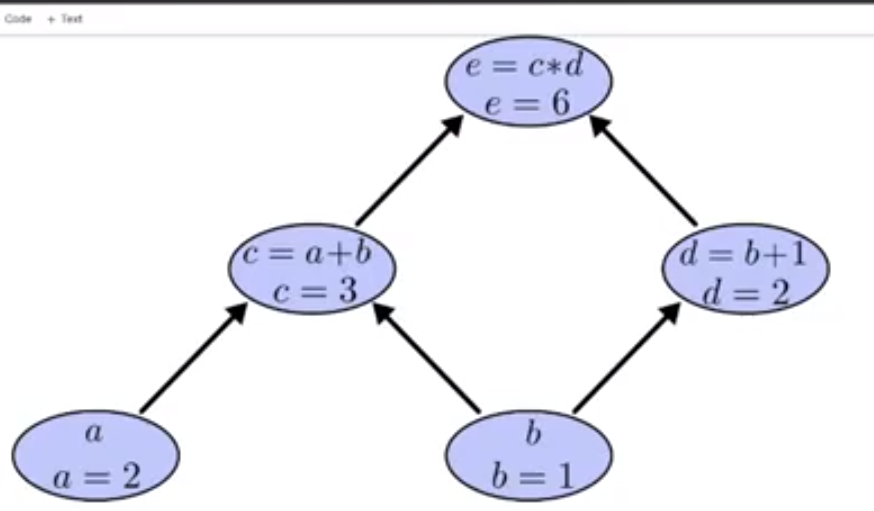

In [61]:
cpu = torch.device('cpu')
gpu = torch.device('cuda')
x = torch.randn(10)
x = x.to(gpu)
x

tensor([ 0.1103,  0.4811, -0.7876, -0.0760, -0.1287, -0.7200, -0.5927, -0.6216,
        -1.0117,  0.6814], device='cuda:0')

In [62]:
x = torch.tensor([1.0],requires_grad=True)
y = (x-2)**2
y.backward()
x , x.grad
# 这里是针对一个变量的情况

(tensor([1.], requires_grad=True), tensor([-2.]))

In [63]:
w = torch.tensor([[np.pi],[1]],requires_grad=True)
def g(w):
  return w[1]*w[0]
z = g(w)
z.backward()
w.grad

tensor([[1.0000],
        [3.1416]])

In [64]:
d_in = 3
d_out = 7
example_tensor = torch.tensor([[1,2,3],[4,5,6]],dtype=float)
linear_model = nn.Linear(d_in,d_out)
linear_model = linear_model.double()
transformed = linear_model(example_tensor)
linear_model.weight
linear_model.bias

Parameter containing:
tensor([-0.0748, -0.0247,  0.3881,  0.2008,  0.3818,  0.1057, -0.4649],
       dtype=torch.float64, requires_grad=True)

In [65]:
activation_func = nn.Sigmoid()
activated = activation_func(example_tensor)
activated

tensor([[0.7311, 0.8808, 0.9526],
        [0.9820, 0.9933, 0.9975]], dtype=torch.float64)

In [66]:
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(nn.Linear(d_in,d_hidden),nn.Tanh(),nn.Linear(d_hidden,d_out),nn.Sigmoid())
model = model.double()
transformed = model(example_tensor)
transformed.shape
params = model.parameters()
for p in params:
  print(p)

Parameter containing:
tensor([[-0.2320, -0.3975, -0.3915],
        [-0.3043, -0.2657,  0.0993],
        [-0.2101, -0.4622, -0.4969],
        [-0.2335,  0.0857, -0.5158]], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([-0.1706, -0.2326,  0.3581, -0.3546], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([[-0.2279,  0.3614,  0.0555,  0.2877]], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([0.2415], dtype=torch.float64, requires_grad=True)


# LossFucntion Definiton

In [ ]:
mse = nn.MSELoss()
intput = torch.randn(3,requires_grad=True)
output = torch.randn(3,requires_grad=True)
loss = mse(input,output)
loss

# Optimizer

In [80]:
model = nn.Linear(1,1)
print(model.weight)
X_simple = torch.tensor([[1.0],[2.0],[3.0]],requires_grad=True)
Y_simple = torch.tensor([[5.0],[7.0],[9.0]])+ torch.randn(3,1)
opt = torch.optim.SGD(model.parameters(),lr=3)
mse_loss = nn.MSELoss()
y_hat = torch.tensor([[5.0],[7.0],[9.0]])
loss = mse_loss(y_hat,Y_simple)
loss.requires_grad = True
opt.zero_grad()
loss.backward()

opt.step()
print(model.weight)


Parameter containing:
tensor([[0.0441]], requires_grad=True)
Parameter containing:
tensor([[0.0441]], requires_grad=True)
